In [103]:
from __future__ import division

import time
import gzip

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap("gray")
plt.rcParams["image.interpolation"] = None

In [2]:
import TN_utils
reload(TN_utils)

<module 'TN_utils' from 'TN_utils.pyc'>

In [68]:
feature_vec, GT_vec, mask_vec = TN_utils.load_neuron()

feature_vec.shape (262144, 60, 2)
GT_vec.shape (262144, 2)
mask_vec.shape (262144,)


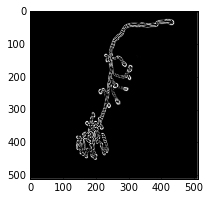

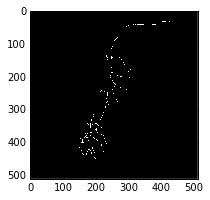

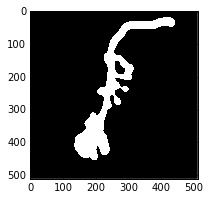

In [69]:
# V test load_toytreefeature_mat
img_shape = (512, 512)
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(feature_vec, axis=2)[:, 12].reshape(img_shape))

plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(GT_vec, axis=1).reshape(img_shape)) 

plt.figure(figsize=(3, 3))
plt.imshow(mask_vec.reshape(img_shape))

In [70]:
# 普通の輝度値
a0_img = plt.imread("../data/neuron01.png").T

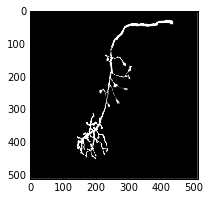

In [71]:
plt.figure(figsize=(3, 3))
plt.imshow(a0_img)

(array([ 252201.,    1136.,     885.,     630.,     546.,     525.,
            452.,     537.,     586.,    4646.]),
 array([ 0.        ,  0.09960784,  0.19921569,  0.29882353,  0.39843137,
         0.49803922,  0.59764706,  0.6972549 ,  0.79686275,  0.89647059,
         0.99607843]),
 <a list of 10 Patch objects>)

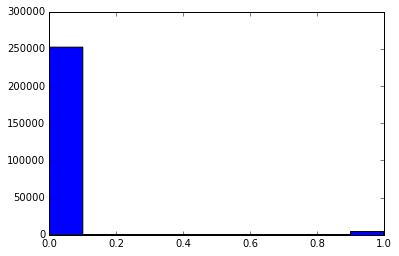

In [72]:
plt.hist(a0_img.flatten())

In [156]:
np.where(a0_img.flatten() == 0)[0].shape

(246295,)

In [73]:
m_a0_vec = a0_img.flatten()[mask_vec]

In [74]:
m_a0_vec.shape

(25553,)

(array([ 15614.,   1133.,    884.,    630.,    546.,    525.,    452.,
           537.,    586.,   4646.]),
 array([ 0.        ,  0.09960784,  0.19921569,  0.29882353,  0.39843137,
         0.49803922,  0.59764706,  0.6972549 ,  0.79686275,  0.89647059,
         0.99607843]),
 <a list of 10 Patch objects>)

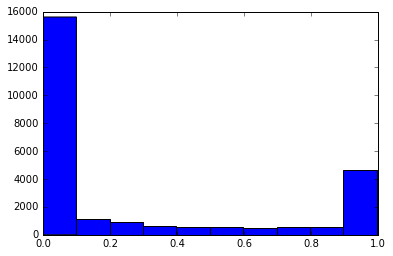

In [75]:
plt.hist(m_a0_vec)

In [76]:
m_feature_vec = feature_vec[mask_vec]
m_GT_vec = GT_vec[mask_vec]
print m_feature_vec.shape, m_GT_vec.shape

(25553, 60, 2) (25553, 2)


In [77]:
# 輝度値を含んだ新しいfeature
m_feature_a0_vec = m_feature_vec * m_a0_vec[:, np.newaxis, np.newaxis]
m_feature_a0_vec.shape

(25553, 60, 2)

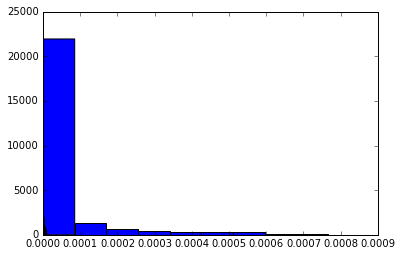

In [78]:
# V 正規化されてない
gomi = plt.hist(np.linalg.norm(m_feature_a0_vec, axis=2)[:, 54])
gomi = plt.hist(np.linalg.norm(m_feature_a0_vec, axis=2)[:, 58])

In [90]:
normed_m_feature_vec, norm_coef = TN_utils.normalize_feature_vec(m_feature_vec)

In [89]:
normed_m_feature_a0_vec, norm_coef = TN_utils.normalize_feature_vec(m_feature_a0_vec)

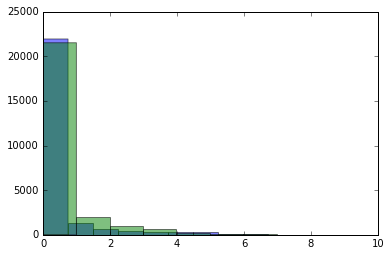

In [80]:
# V まあまあされてる
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec, axis=2)[:, 54], alpha=0.5)
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec, axis=2)[:, 58], alpha=0.5)

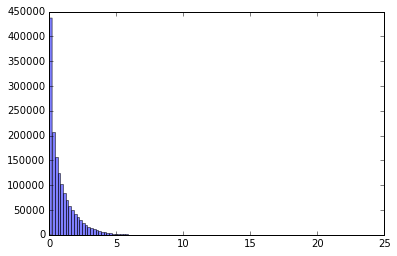

In [160]:
gomi = plt.hist(np.linalg.norm(normed_m_feature_vec, axis=2).flatten(), bins=100, alpha=0.5)

In [157]:
np.where(np.linalg.norm(normed_m_feature_vec, axis=2).flatten() ==0)[0].shape

(0,)

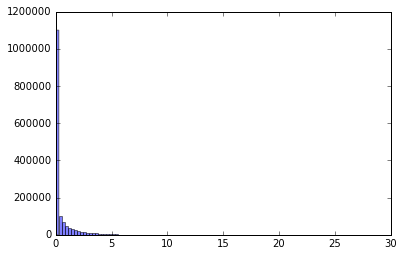

In [161]:
gomi = plt.hist(np.linalg.norm(normed_m_feature_a0_vec, axis=2).flatten(), alpha=0.5, bins=100)
# きっかり０になってるとこ多すぎ
np.where(np.linalg.norm(normed_m_feature_a0_vec, axis=2).flatten() ==0)[0].shape

In [134]:
nm_feature_vec_mul_a0 = normed_m_feature_vec * m_a0_vec[:, np.newaxis, np.newaxis]

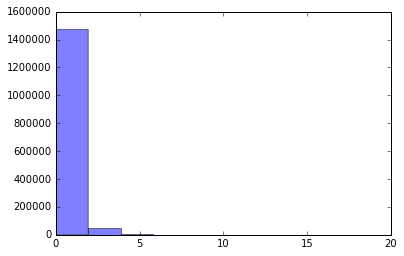

In [135]:
gomi = plt.hist(np.linalg.norm(nm_feature_vec_mul_a0 , axis=2).flatten(), alpha=0.5)

In [162]:
# ０になるのを避ける
# 輝度値を含んだ新しいfeature
m_feature_a0_vec = m_feature_vec * (m_a0_vec[:, np.newaxis, np.newaxis] + 0.001)
m_feature_a0_vec.shape

(25553, 60, 2)

In [163]:
normed_m_feature_a0_vec, norm_coef = TN_utils.normalize_feature_vec(m_feature_a0_vec)

(0,)

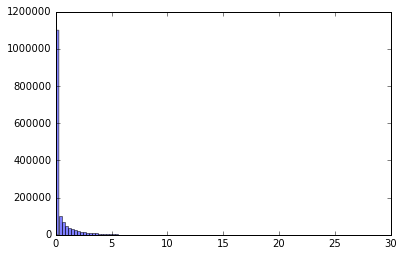

In [164]:
gomi = plt.hist(np.linalg.norm(normed_m_feature_a0_vec, axis=2).flatten(), alpha=0.5, bins=100)
# きっかり０になってるとこはなくなった
np.where(np.linalg.norm(normed_m_feature_a0_vec, axis=2).flatten() ==0)[0].shape

In [38]:
import TNN
reload(TNN)

<module 'TNN' from 'TNN.pyc'>

In [165]:
n_hidden = 10
# test myself
result = TNN.ab(normed_m_feature_a0_vec , m_GT_vec,
                normed_m_feature_a0_vec , m_GT_vec,
                n_hidden=n_hidden, h_activation="ReLU", out_activation="ReLU") 

In [166]:
f_train, f_training_error, f_test_error, f_output, s_input, s_target, param2_list, a_list, b_list, bias_list = result

In [167]:
permu_index = np.random.permutation(range(normed_m_feature_a0_vec.shape[0]))
pnm_feature_vec = normed_m_feature_a0_vec[permu_index]
pm_GT_vec = m_GT_vec[permu_index]

In [168]:
pnm_feature_vec.shape

(25553, 60, 2)

In [169]:
s_input.set_value(pnm_feature_vec)
s_target.set_value(pm_GT_vec)

In [193]:
n_tensor = 60
param2_list[0].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[1].set_value(0.01*np.random.normal(size=(n_hidden, )))
param2_list[2].set_value(0.)
for i in range(n_hidden):
    a_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    b_list[i].set_value(0.01*np.random.normal(size=(n_tensor, )))
    bias_list[i].set_value(0.)

In [194]:
lr = 1.
reg2 = 0.
batch_size = 1000
n_batchs = s_input.get_value(borrow=True).shape[0] // batch_size

n_epochs = 1000
interval = 100
cost_array = np.zeros((n_epochs // interval,))

In [195]:
for i_epoch in xrange(n_epochs):
    for i_batch in xrange(n_batchs):
        f_train(i_batch, lr, reg2, batch_size)
    if i_epoch == 500:
        batch_size = 5000

    if i_epoch % interval == 0:
        cost = f_training_error()[0]
        cost_array[i_epoch // interval] = cost
        print i_epoch, cost

0 0.0258438496282
100 0.0241513766781
200 0.0225466543411
300 0.0209519260895
400 0.0200658981537
500 0.01977794524
600 0.0196778001423
700 0.0195958671165
800 0.0195246174553
900 0.0194609401741


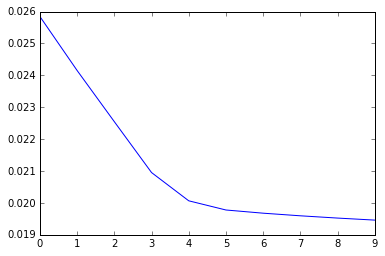

In [196]:
# V 
plt.plot(cost_array)

In [199]:

gt2_vec = f_output(feature_vec* (a0_img.flatten()[:, np.newaxis, np.newaxis]+ 0.001)/norm_coef[:, np.newaxis])[0]
gt1_img = TN_utils.convert_gt2vec_to_gt1img(gt2_vec, img_shape)
sio.savemat("../tmp/gt1.mat", {"v_train": gt1_img})

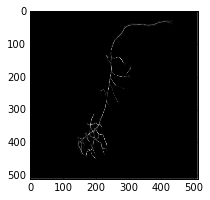

In [200]:
# V
plt.figure(figsize=(3, 3))
plt.imshow(np.linalg.norm(gt1_img, axis=0).T)

In [189]:
with open("../results/neuron_a0/error_nh100bs1000.npy", "w") as f:
    np.save(f, cost_array)
sio.savemat("../results/neuron_a0/gt1_nh100bs1000.mat", {"v_train": gt1_img})